## Student name: Eyobed Astatke
## Assignment: Regression

### Part 1: Data Wrangling (50 pts)
You have to write code to answer the questions below
7 pts each subtask except for the first one (importing pandas...) which is worth 1 pt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
"""
Import pandas library
Read the data stored in your local machine https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
Save data to a variable named df
"""
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [2]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [3]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

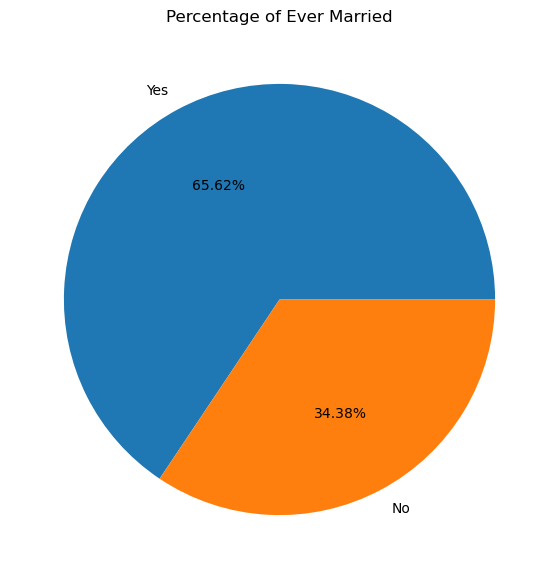

In [4]:
'''
Use a pie chart to show the percentage of ever_married with labels and percentage rounded up to 2 decimals.
'''
num_rows = len(df)
yes_count = (df['ever_married'] == 'Yes').sum()
no_count = (df['ever_married'] == 'No').sum()
data = [yes_count/num_rows, no_count/num_rows]
label = ['Yes', 'No']
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = label,autopct='%1.2f%%',startangle=0)
plt.title('Percentage of Ever Married') 
# show plot
plt.show()

In [5]:
'''
Encode the categorical columns to numeric. There are two types of encoding: ordinal and one-hot. Explain why you choose the encoding technique to the column(s) and implement it. Show some rows of df after encoding. There will be no printed console in this subtask
Reference (you may need incognito mode to browse the pages):
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
    https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79
    https://stackoverflow.com/questions/56502864/using-ordinalencoder-to-transform-categorical-values
    https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
    https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
'''

'\nEncode the categorical columns to numeric. There are two types of encoding: ordinal and one-hot. Explain why you choose the encoding technique to the column(s) and implement it. Show some rows of df after encoding. There will be no printed console in this subtask\nReference (you may need incognito mode to browse the pages):\n    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html\n    https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79\n    https://stackoverflow.com/questions/56502864/using-ordinalencoder-to-transform-categorical-values\n    https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python\n    https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html\n'

In [6]:
# catagories columns with object data_types
df_obj = df.select_dtypes(include=['object'])
df_obj.head(10)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked
6,Male,Yes,Private,Rural,never smoked
7,Female,No,Private,Urban,never smoked
8,Female,Yes,Private,Rural,Unknown
9,Female,Yes,Private,Urban,Unknown


In [7]:
df_obj.isnull().sum()

gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [8]:
gender_types = df_obj['gender'].unique()
print(gender_types)

['Male' 'Female' 'Other']


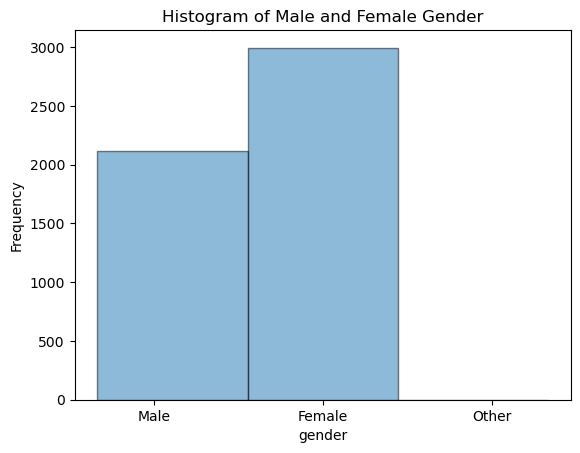

In [9]:
plt.hist(df_obj['gender'], bins=3, edgecolor='black', alpha=0.5 )
plt.xticks([0.25, 1,1.75], ['Male', 'Female','Other'])
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Histogram of Male and Female Gender')
plt.show()


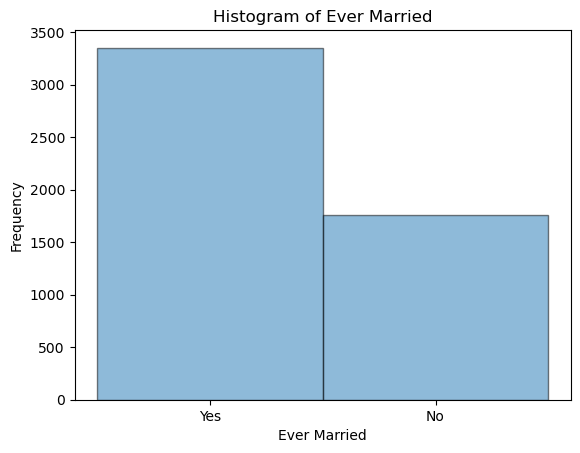

In [10]:
plt.hist(df_obj['ever_married'], bins=2, edgecolor='black', alpha=0.5 )
plt.xticks([0.25, .75], ['Yes', 'No'])
plt.xlabel('Ever Married')
plt.ylabel('Frequency')
plt.title('Histogram of Ever Married')
plt.show()

In [11]:
emp_types = df_obj['work_type'].unique()
print(emp_types)

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


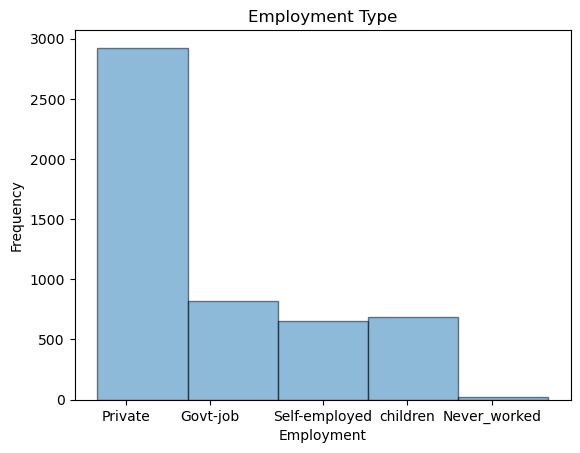

In [12]:
plt.hist(df_obj['work_type'], bins=5, edgecolor='black', alpha=0.5 )
plt.xticks([0.25,1,2,2.75,3.5], [ 'Private', 'Govt-job' ,'Self-employed','children','Never_worked'])
plt.xlabel('Employment')
plt.ylabel('Frequency')
plt.title('Employment Type')
plt.show()

In [13]:
res_types = df_obj['Residence_type'].unique()
print(res_types)

['Urban' 'Rural']


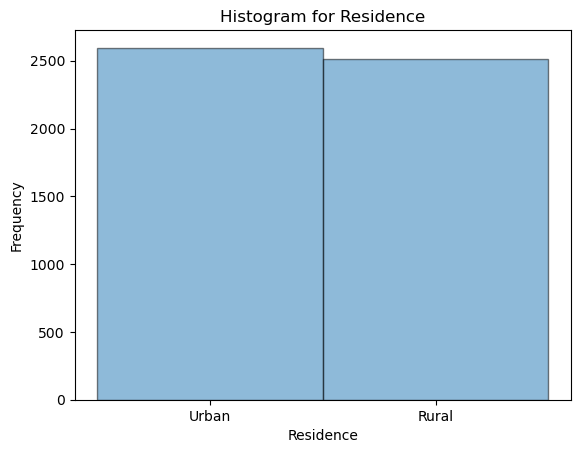

In [14]:
plt.hist(df_obj['Residence_type'], bins=2, edgecolor='black', alpha=0.5 )
plt.xticks([0.25, .75], ['Urban', 'Rural' ])
plt.xlabel('Residence')
plt.ylabel('Frequency')
plt.title('Histogram for Residence')
plt.show()

In [15]:
smk_types = df_obj['smoking_status'].unique()
print(smk_types)

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


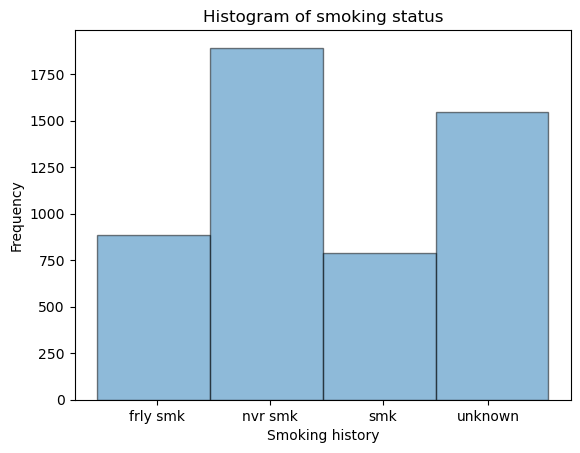

In [16]:
plt.hist(df_obj['smoking_status'], bins=4, edgecolor='black', alpha=0.5 )
plt.xticks([0.4,1.15,1.9,2.6], ['frly smk', 'nvr smk', 'smk', 'unknown'])
plt.xlabel('Smoking history')
plt.ylabel('Frequency')
plt.title('Histogram of smoking status')
plt.show()

### One hot encoding is preprocessing method for indepedent catagorical data the column it includes nominal variable e.x gender (male and female) are unque values indepedent of one another, work type have unqie indepedent values (private, govt job, self employed), Residence type also has unquie values,same for smoking status there is unquie value a nominal variable 

In [17]:
# Encoding above ordinal data using OrdinalEncoder for ever_married 
from sklearn.preprocessing import OneHotEncoder
ohe =  OneHotEncoder()
ohe.fit(df[['gender', 'work_type', 'Residence_type', 'smoking_status']])

OneHotEncoder()

In [18]:
df_ohe = ohe.transform(df[['gender', 'work_type', 'Residence_type', 'smoking_status']]).toarray()
col_names = ohe.get_feature_names_out(['gender', 'work_type', 'Residence_type', 'smoking_status'])

In [19]:
df_final = pd.DataFrame(df_ohe, columns=col_names)
df_final = pd.concat([df, df_final], axis=1)
df_final.drop(['gender', 'work_type', 'Residence_type', 'smoking_status'], axis=1, inplace=True)


In [20]:
 df_final.head(10)

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,Yes,228.69,36.6,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,Yes,202.21,NaN,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,Yes,105.92,32.5,1,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,Yes,171.23,34.4,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,Yes,174.12,24.0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,56669,81.0,0,0,Yes,186.21,29.0,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,53882,74.0,1,1,Yes,70.09,27.4,1,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,10434,69.0,0,0,No,94.39,22.8,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,27419,59.0,0,0,Yes,76.15,NaN,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,60491,78.0,0,0,Yes,58.57,24.2,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### The case of martial status is catagory an ordinal variable in this case it can be catagorized into married and unmarried catagory 

In [21]:
# Encoding above ordinal data using OrdinalEncoder for ever_married 
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_final[['ever_married']] = ordinal_encoder.fit_transform(df_final[['ever_married']])
df_final.head(10)

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1.0,228.69,36.6,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,1.0,202.21,NaN,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,1.0,105.92,32.5,1,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,1.0,171.23,34.4,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,1.0,174.12,24.0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,56669,81.0,0,0,1.0,186.21,29.0,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,53882,74.0,1,1,1.0,70.09,27.4,1,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,10434,69.0,0,0,0.0,94.39,22.8,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,27419,59.0,0,0,1.0,76.15,NaN,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,60491,78.0,0,0,1.0,58.57,24.2,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [22]:
# Return boolean values indicating the number of missing rows of each column in ascending order. Do not overwrite df.

In [23]:
missing_values = df_final.isna().sum().sort_values()
print(missing_values)

id                                  0
smoking_status_formerly smoked      0
smoking_status_Unknown              0
Residence_type_Urban                0
Residence_type_Rural                0
work_type_children                  0
work_type_Self-employed             0
work_type_Private                   0
work_type_Never_worked              0
work_type_Govt_job                  0
gender_Other                        0
gender_Male                         0
gender_Female                       0
stroke                              0
avg_glucose_level                   0
ever_married                        0
heart_disease                       0
hypertension                        0
age                                 0
smoking_status_never smoked         0
smoking_status_smokes               0
bmi                               201
dtype: int64


In [24]:
'''
Use one of imputation techniques in https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation on bmi
Remember to keep df as of DataFrame type after applying imputation
Show the total number of missing values of the entire dataset
'''

'\nUse one of imputation techniques in https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation on bmi\nRemember to keep df as of DataFrame type after applying imputation\nShow the total number of missing values of the entire dataset\n'

In [25]:
print(df_final['bmi'].head(10))

0    36.6
1     NaN
2    32.5
3    34.4
4    24.0
5    29.0
6    27.4
7    22.8
8     NaN
9    24.2
Name: bmi, dtype: float64


In [26]:
from sklearn.impute import KNNImputer
# create a KNNImputer object with k=3
imputer = KNNImputer(n_neighbors=50, weights="uniform")
# impute missing values in the 'bmi' column
df_final['bmi'] = imputer.fit_transform(df_final[['bmi']])    
print(df_final['bmi'])   
    


0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64


In [27]:
missing_values = df_final.isnull().sum().sum()
# print the number of missing values
print("Total number of missing values:", missing_values)

Total number of missing values: 0


In [28]:
'''Categorize bmi into groups as https://images.agoramedia.com/everydayhealth/gcms/BMI-in-Adults-722x406.jpg?width=722.
Print the column bmi after transformed. Do not overwrite to df
'''

'Categorize bmi into groups as https://images.agoramedia.com/everydayhealth/gcms/BMI-in-Adults-722x406.jpg?width=722.\nPrint the column bmi after transformed. Do not overwrite to df\n'

In [29]:
bmi_ctgrs = [-np.inf, 18.5, 24.9, 29.9, 34.9, np.inf]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese', 'Extremly Obese']
print(len(bmi_ctgrs))
print(len(bmi_labels))

6
5


In [30]:
bmi_group= pd.cut(df_final['bmi'], bins=bmi_ctgrs , labels=bmi_labels)
print(df_final['bmi'])

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64


In [31]:
bmi_group

0       Extremly Obese
1           Overweight
2                Obese
3                Obese
4        Normal weight
             ...      
5105        Overweight
5106    Extremly Obese
5107             Obese
5108        Overweight
5109        Overweight
Name: bmi, Length: 5110, dtype: category
Categories (5, object): ['Underweight' < 'Normal weight' < 'Overweight' < 'Obese' < 'Extremly Obese']

In [32]:
'''
Show the column avg_glucose_level whose values are binned into 10 equal-sized discrete intervals with labels such as "level 1", "level 2", etc.
Do not overwrite to df
'''

'\nShow the column avg_glucose_level whose values are binned into 10 equal-sized discrete intervals with labels such as "level 1", "level 2", etc.\nDo not overwrite to df\n'

In [33]:
df_final['avg_glucose_level']

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

In [34]:
# divide glucose level into 10 levels
glc_lvl = pd.cut(df_final['avg_glucose_level'], bins=10)
glc_lbl = []
for i in range(1,11):
    label =f'level {i}'
    glc_lbl.append(label)


In [35]:
glc_cat = glc_lvl.cat.rename_categories(glc_lbl)
print(glc_cat)

0       level 9
1       level 7
2       level 3
3       level 6
4       level 6
         ...   
5105    level 2
5106    level 4
5107    level 2
5108    level 6
5109    level 2
Name: avg_glucose_level, Length: 5110, dtype: category
Categories (10, object): ['level 1' < 'level 2' < 'level 3' < 'level 4' ... 'level 7' < 'level 8' < 'level 9' < 'level 10']


In [36]:
'''
Show the column avg_glucose_level whose values are binned into 5 equal percentile intervals with labels such as "level 1", "level 2", etc.
Do not overwrite to df
'''

'\nShow the column avg_glucose_level whose values are binned into 5 equal percentile intervals with labels such as "level 1", "level 2", etc.\nDo not overwrite to df\n'

In [37]:
glc_lvl5 = pd.cut(df_final['avg_glucose_level'], bins=5)
glc_lbl5 = []
for i in range(1,6):
    label =f'level {i}'
    glc_lbl5.append(label)


In [38]:
print(glc_lvl5)

0        (228.416, 271.74]
1       (185.092, 228.416]
2        (98.444, 141.768]
3       (141.768, 185.092]
4       (141.768, 185.092]
               ...        
5105      (54.903, 98.444]
5106     (98.444, 141.768]
5107      (54.903, 98.444]
5108    (141.768, 185.092]
5109      (54.903, 98.444]
Name: avg_glucose_level, Length: 5110, dtype: category
Categories (5, interval[float64, right]): [(54.903, 98.444] < (98.444, 141.768] < (141.768, 185.092] < (185.092, 228.416] < (228.416, 271.74]]


In [39]:
glc_cat5 = glc_lvl5.cat.rename_categories(glc_lbl5)
print(glc_cat5)

0       level 5
1       level 4
2       level 2
3       level 3
4       level 3
         ...   
5105    level 1
5106    level 2
5107    level 1
5108    level 3
5109    level 1
Name: avg_glucose_level, Length: 5110, dtype: category
Categories (5, object): ['level 1' < 'level 2' < 'level 3' < 'level 4' < 'level 5']


In [40]:
df_final.head(10)

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1.0,228.69,36.600000,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,1.0,202.21,28.893237,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,1.0,105.92,32.500000,1,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,1.0,171.23,34.400000,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,1.0,174.12,24.000000,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,56669,81.0,0,0,1.0,186.21,29.000000,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,53882,74.0,1,1,1.0,70.09,27.400000,1,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,10434,69.0,0,0,0.0,94.39,22.800000,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,27419,59.0,0,0,1.0,76.15,28.893237,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,60491,78.0,0,0,1.0,58.57,24.200000,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


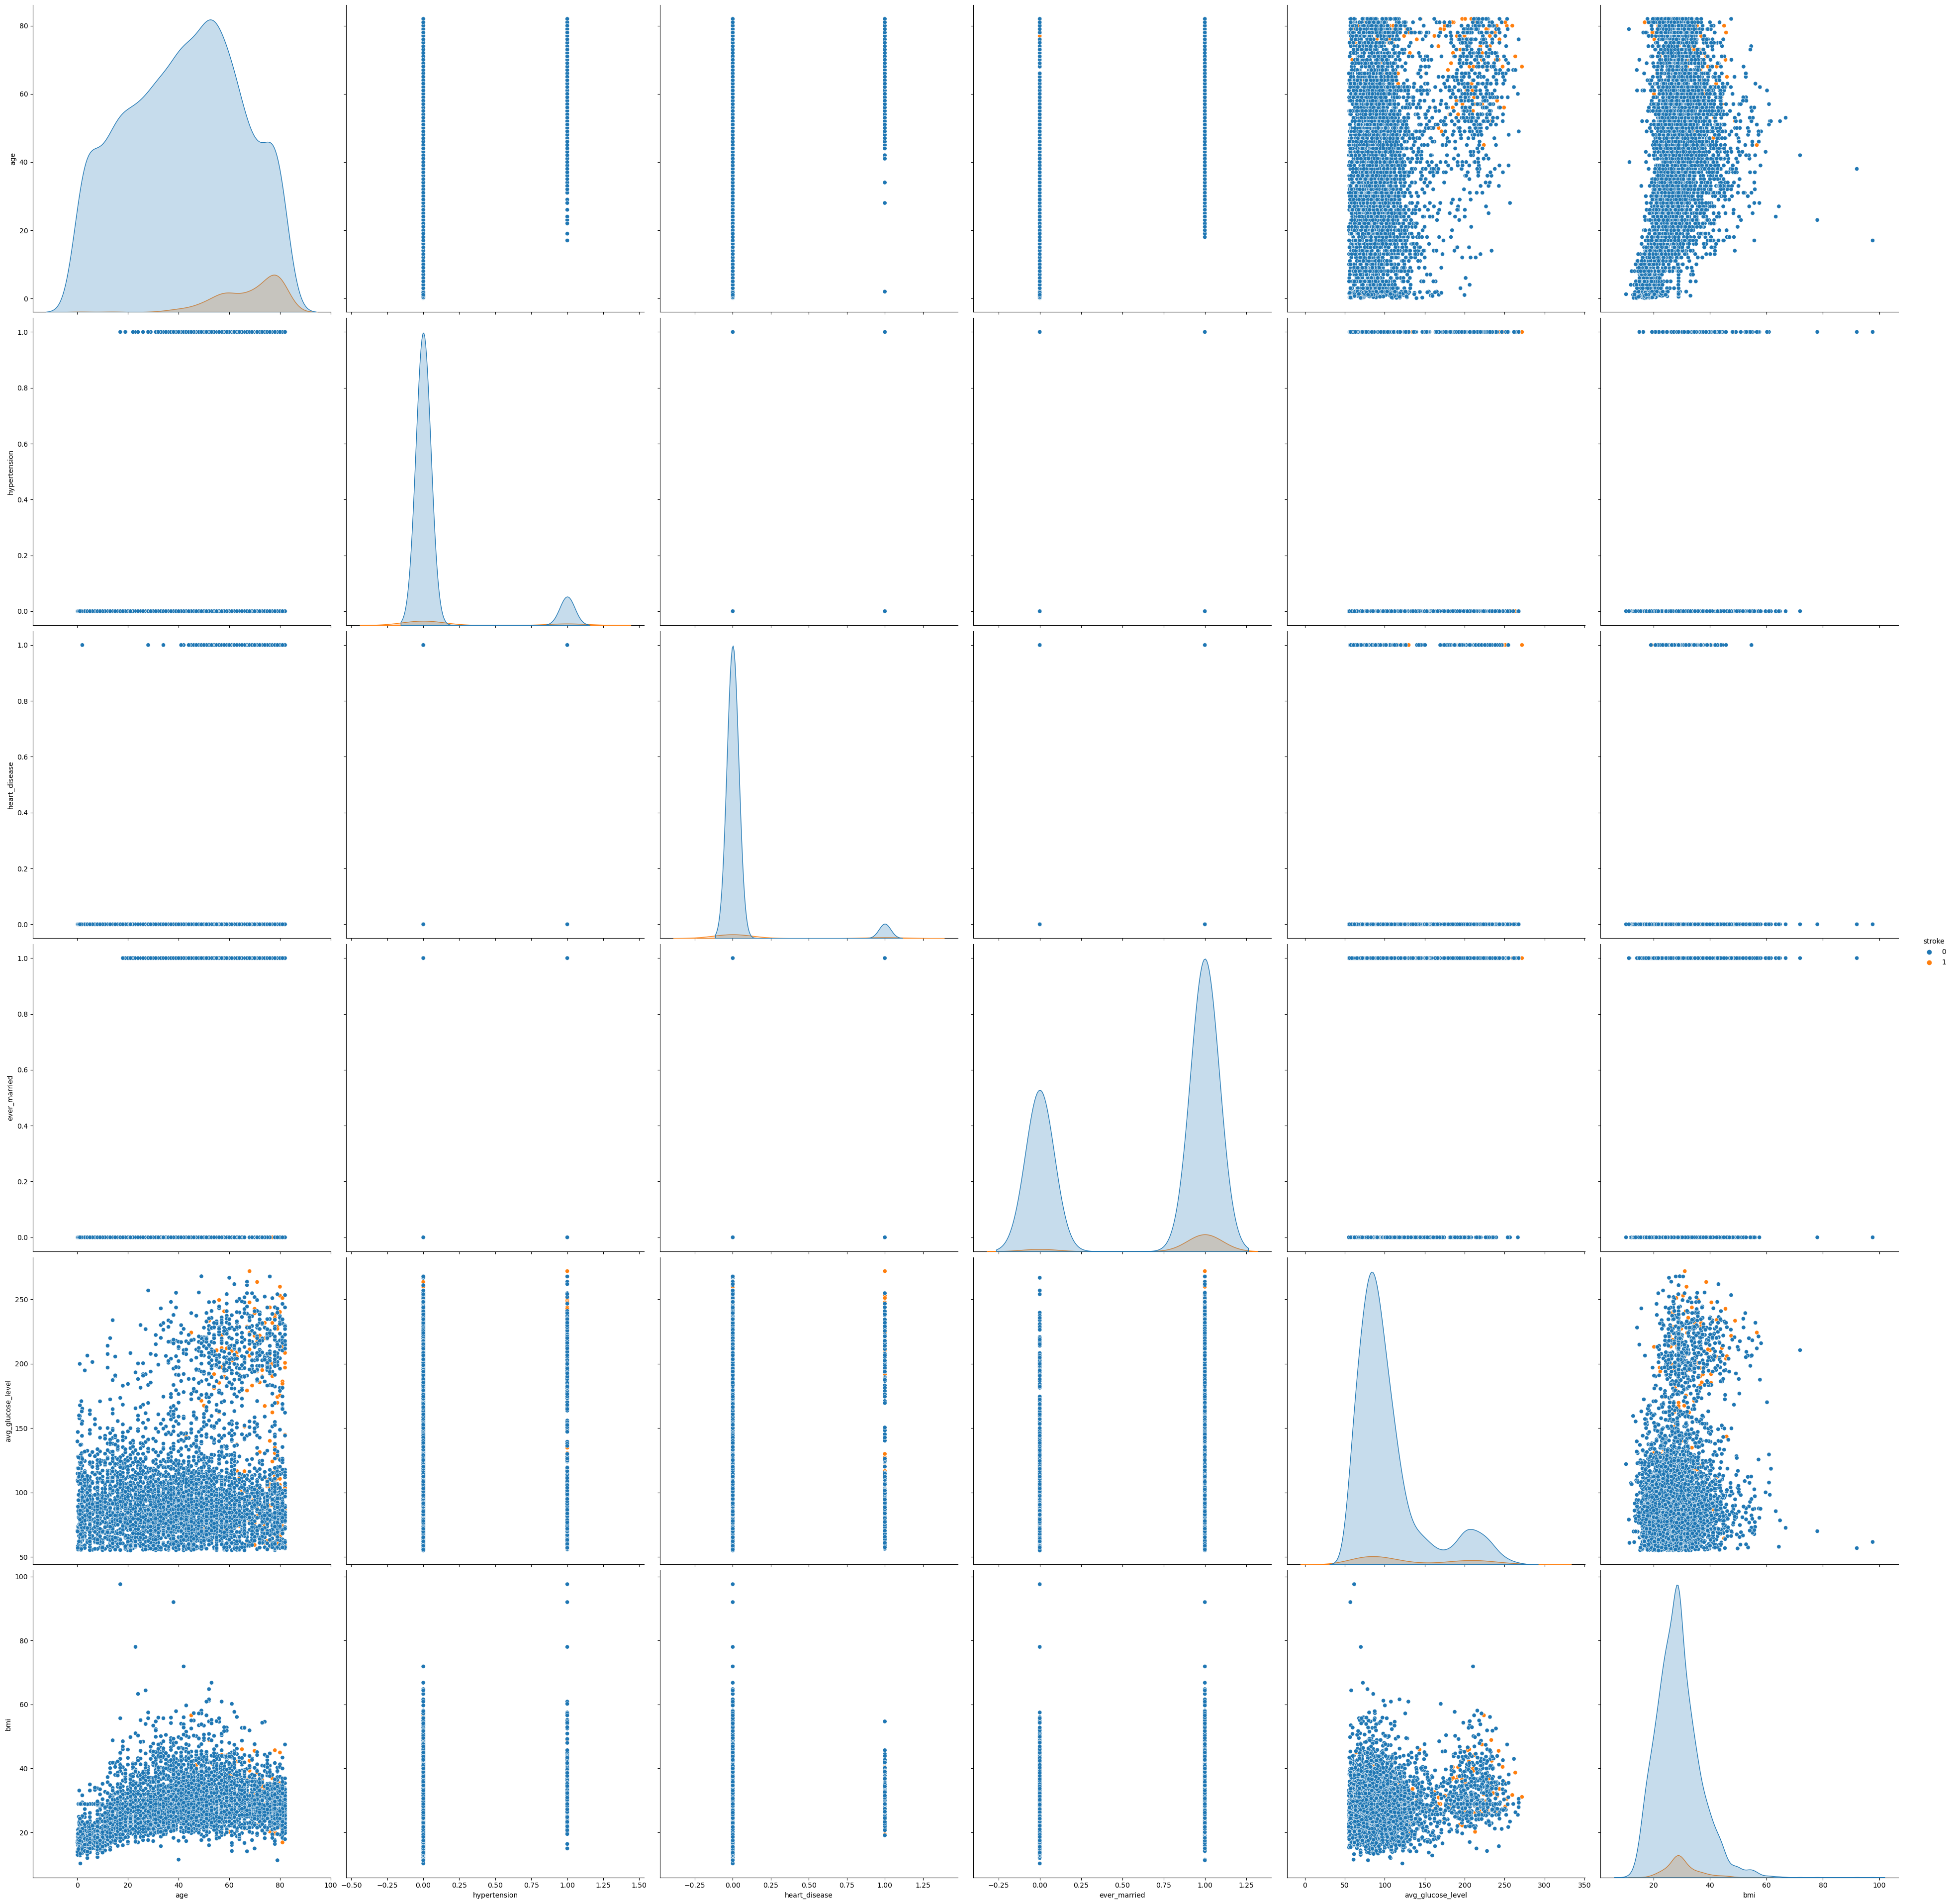

In [41]:
import seaborn as sns
%matplotlib inline
df_prpl = df_final[['age','hypertension','heart_disease','ever_married','avg_glucose_level','bmi','stroke']].copy()
sns.pairplot(df_prpl, hue='stroke', height=6.5)

### Part 2: Logistic Regression(50 pts)

In [42]:
'''
10 pts:
Assign X to be the whole df without column stroke and y to be the column stroke. Split X and y into X_train, X_test, y_train, and y_test with random_state=1 and test_size=0.2.
Should you use stratify? Explain
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
'''

'\n10 pts:\nAssign X to be the whole df without column stroke and y to be the column stroke. Split X and y into X_train, X_test, y_train, and y_test with random_state=1 and test_size=0.2.\nShould you use stratify? Explain\nReference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html\n'

30 pts
Write a class My_LG that implements Logistic Regression algorithm. You are required to have the following attributes
* Method:
    * fit
    * predict

<br> Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
<br> **Using a pre-built library yields no credit. You have to write everything from scratch.**

In [47]:
from sklearn.model_selection import train_test_split
X = df_final.drop('stroke', axis=1)
y = df_final['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
print(X.shape)
print(y.shape)

(5110, 21)
(5110,)


In [49]:
class My_LG():
    def __init__(self, lrn_rt =0.01, n_iters = 1000):
        self.lrn_rt = lrn_rt
        self.n_iters = n_iters
        self.wght = None
        self.bias = None
        
    # Sigmoid equation to plot the graph    
    def sigmoid(self,x):
        x = np.clip(x, -500, 500)
        return 1/(1+np.exp(-x))    
        
    def fit(self, X, y):
        # Initialize weights and bias to zero
        n_samp, n_feat = X.shape
        self.wght = np.zeros(n_feat)
        self.bias = 0
        
        for i in range(self.n_iters):
            # Z = WX + B
            # hΘ(x) = sigmoid (Z)
            z = np.dot(X, self.wght) + self.bias
            sig_pred = self.sigmoid(z)
            
            d_wght = (1/n_samp)*np.dot(X.T,(sig_pred - y))
            d_bias = (1/n_samp)*np.sum((sig_pred - y))
                                       
            self.wght = self.wght - self.lrn_rt * d_wght
            self.bias = self.bias - self.lrn_rt*d_bias
                                       
    def predict(self, X):
        z = np.dot(X, self.wght) + self.bias
        y_pred = self.sigmoid(z)
        val_pred = []
        for i in y_pred:
            if i <= 0.5:
                sol = 0
                val_pred.append(sol)
            else:
                sol = 1
                val_pred.append(sol)
        
        return val_pred


In [50]:
# Run the code
reg = My_LG()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [100]:
'''
10 pts
Use a metric of either accuracy_score or balanced_accuracy_score to evaluate your predicted values and y_test
Explain why you prefer this metric over the other.
'''

'\n10 pts\nUse a metric of either accuracy_score or balanced_accuracy_score to evaluate your predicted values and y_test\nExplain why you prefer this metric over the other.\n'

In [51]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.941


In [52]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy: {balanced_accuracy:.4f}")

Balanced accuracy: 0.5000


### In this project the stroke label that we are trying to predict output have two binary solution 1 or 0. In this case the accuracy score good metric it reflects good insight for an output of potive or negative (True or False) kind of data solution. 
### In the case of balanced accuracy score it does postive for impalanced label sample.